In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [7]:
df = pd.read_csv("C:\\Users\\hanis\\OneDrive\\file1.csv")


In [8]:
df_numeric = df.select_dtypes(include=[np.number])

In [9]:
X = df_numeric.drop(columns=["fire_weather_index"])
y = df_numeric["fire_weather_index"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Linear Regression R²:", r2_score(y_test, y_pred))

Linear Regression RMSE: 4.163431636254998
Linear Regression R²: 0.9295241198292471


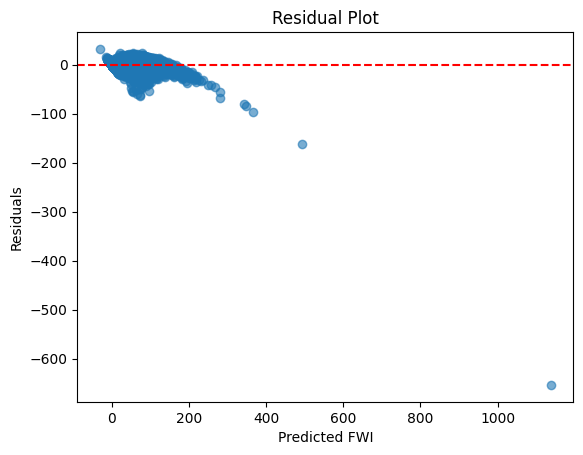

In [12]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [13]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nVariance Inflation Factors:\n", vif_data)



Variance Inflation Factors:
                     feature         VIF
0               temperature  144.609120
1     dew_point_temperature   48.973781
2         relative_humidity  160.104474
3                wind_speed    4.600274
4            wind_direction    4.809438
5      atmospheric_pressure  476.848478
6                visibility    7.247809
7             precipitation    1.810548
8                 rain_days    1.829798
9            snow_on_ground    1.000008
10  fine_fuel_moisture_code   49.665388
11       duff_moisture_code   80.067770
12             drought_code   12.897125
13           build_up_index  129.261657
14     initial_spread_index    5.440371
15    daily_severity_rating    5.074040
16                 latitude   54.247614
17                longitude    9.973021
18                elevation    2.872313


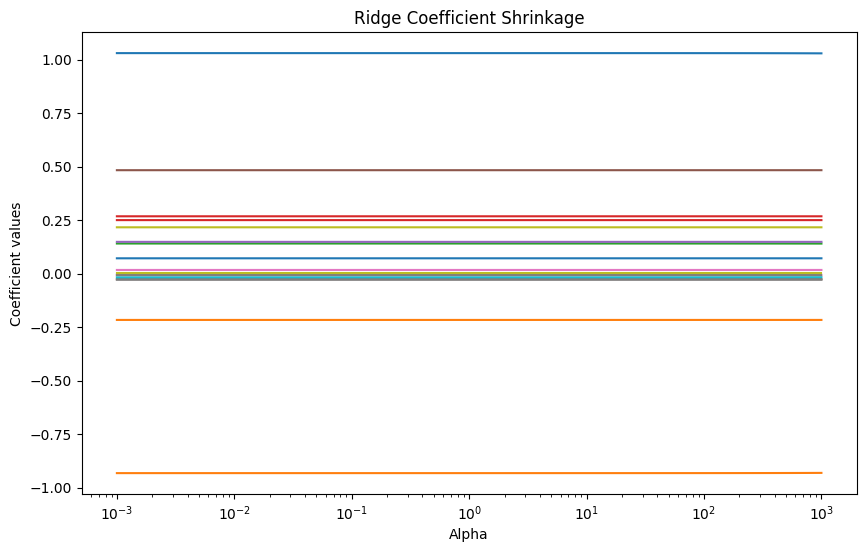

In [14]:
alphas = np.logspace(-3, 3, 50)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10,6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Coefficient values")
plt.title("Ridge Coefficient Shrinkage")
plt.show()